# Surya Sama Homework Set 3
$\renewcommand{bs}{\mathbf}$

**Unless explicitly forbidden, you can use any python functions from `numpy`/`scipy`/`pandas`/`matplotlib` to solve homework problems.**

## Problem 1 (50 points)
We discussed three different ways of solving the least square problem of $\min_{\bs \beta}\Vert X \bs \beta - \bs y\Vert_2$ in the lecture: 
(a) the pseudo-inverse $X^+$ 
(b) QR decomposition 
(c) SVD. 




1. if $X$ is not fully ranked, *i.e.*, its column vectors are linearly dependent, do the three methods still work?
2. if not, can you propose an modifications to the QR method, so that you can find the minimum value of $\Vert X \bs \beta - \bs y\Vert_2$ even when $X$ is rank deficient? Note that $\bs \beta$ is not unique when $X$ is not fully ranked, but there is still a deterministic answer to the minimum value of $\Vert X \bs \beta - \bs y\Vert_2$. 
3. what is an easy and effective method to find a $\bs \beta$ that is good enough when $X$ is not fully ranked in practice?

Note: It is also possible to make SVD work with rank deficient matrix. Please refer to http://www.cs.cornell.edu/Courses/cs3220/2010sp/notes/svd.pdf if you are interested.

## Problem 1 Solution

## Part 1
All the three methods work if the X is no tof full rank. Pseudo inverse is used because we cannot get the inverse of a matrix if its not fully ranked. The QR decomposition fails if the matrix is not of full rank. SVD works too because, SVD can approximate X by taking non zero singular values into consideration and reconstructing a new X matrix which is of full rank and has most of the information that real X has.

## Part 2
We can use QR with column pivoting to get approximate beta values by constructing a column permuted matrix to transform X and then perform QR decomposition.

## Part 3
The efficient method would be using Singular value decomposition when the matrix is not fully ranked. The pseudoinverse is  easy when it comes to matrices with no full rank. But the efficincy of SVD is better than pseudo inverse.

## Problem 2 (50 points)
In class, we used Constant Maturity Treasuries (CMT) for a fixed time period. The data are on the [Treasury website](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield) and range from 1 month to 30 years. There is also an alternative source of the [data](https://fred.stlouisfed.org/categories/115), use whichever source you like.  Develop code that extracts the daily yields for the 6 month to 20 year Treasuries for 1995 through 2020 to use in what follows.

Take the covariance matrix $V$ estimated from the CMT historical levels 1995 to 2010, compute the following:
1. its L-2 condition number
2. its singular values, and the ratio between the largest and smallest singular values
3. Comment on whether there could be a troubled time period when computing $\bs y = V^{-1} \bs x$ from this co-variance matrix, if so, give an example of $\bs x$ that the resulting $\bs y$ changes a lot even with a small perturbations in $x$.

## Scraping the dataset

In [134]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [98]:
#Creating list of years we need the data for
years = ['1995', '1996', '1997', '1998','1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2021', '2013', '2014', '2015', '2016','2017', '2018', '2019', '2020']

In [88]:
len(years)

26

In [91]:
#Scraping the interest rates table column names from the treasury website
url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=1995'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, 'lxml')
int_rates_table = soup.find('table', attrs = {'class' : 't-chart'})
data = int_rates_table.find_all("tr")
columns = []
for th in data[0].find_all('th'):
    columns.append(th.text)
print(columns) 

['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr', '7 yr', '10 yr', '20 yr', '30 yr']


In [92]:
# Scraping the table from tresury website
final_data = []
for i in range(len(years)):
    url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year={}'.format(years[i]) #looping through urls for different years data
    html_content = requests.get(url).text # converying html to text
    soup = BeautifulSoup(html_content, 'lxml') 
    int_rates_table = soup.find('table', attrs = {'class' : 't-chart'}) #extracting the table from html text and cleaning the table
    data = int_rates_table.find_all("tr")
    for tr in int_rates_table.find_all('tr'):
        t_row = {}
        for td, th in zip(tr.find_all('td'), columns):
            t_row[th] = td.text.replace('\n', '').strip()
        final_data.append(t_row)      
        


In [135]:
#Converting the tables to a dataframe
rates = pd.DataFrame(final_data) 
rates = rates.dropna(how = 'all')
cols = ['6 mo','1 yr','2 yr','3 yr','5 yr','7 yr','10 yr','20 yr','Date']
rates = rates[cols]

In [136]:
rates.Date = pd.to_datetime(rates.Date)

In [137]:
rates.set_index(rates.Date, inplace = True)

In [138]:
rates.drop(columns = 'Date')

,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
Date,,,,,,,,
1995-01-03,6.66,7.23,7.73,7.84,7.88,7.91,7.88,8.07
1995-01-04,6.57,7.15,7.62,7.75,7.81,7.82,7.82,7.98
1995-01-05,6.61,7.32,7.66,7.83,7.87,7.89,7.88,8.03
1995-01-06,6.61,7.26,7.64,7.81,7.87,7.89,7.87,8.00
1995-01-09,6.67,7.27,7.68,7.84,7.90,7.92,7.89,8.03
1995-01-10,6.62,7.21,7.63,7.78,7.85,7.87,7.84,8.00
1995-01-11,6.51,7.13,7.58,7.73,7.80,7.82,7.79,7.98
1995-01-12,6.48,7.08,7.56,7.73,7.80,7.84,7.80,8.02
1995-01-13,6.38,6.89,7.39,7.55,7.64,7.71,7.69,7.93


In [207]:
rates.to_csv('rates_full.csv')

In [139]:
import datetime as dt

In [140]:
# Slicing the dataset
start = rates.index.searchsorted(dt.datetime(1995,1,3))
end = rates.index.searchsorted(dt.datetime(2010,12,31))
rates_2010 = rates[start : end]

In [141]:
rates_2010.drop(columns = 'Date', inplace = True)

In [155]:
rates_2010.to_csv('rates_2010.csv')

In [156]:
cmt_2010 = pd.read_csv('rates_2010.csv')

In [160]:
cmt_2010.set_index(cmt_2010.Date, inplace = True)

In [163]:
cmt_2010.drop(columns = 'Date', inplace = True)

In [165]:
cmt_2010 = cmt_2010.astype('float')

In [167]:
cv = cmt_2010.cov()

In [168]:
import numpy as np

## Parts 1 and 2

In [206]:
# Computing the l2 condition number
l2_condition_number = np.linalg.cond(cv, 2)
l2_condition_number

39692.39748398089

In [193]:
# Computing the ratio between largest and smallest singular values and obtaining the singular values
ev,e = np.linalg.eig(cv.T.dot(cv))
ev
singular_values = np.sqrt(ev)
singular_values
ratio_1 = max(singular_values)/min(singular_values)
ratio_1

39692.398919928055

In [205]:
singular_values

array([2.04226738e+01, 7.99059096e-01, 4.07807053e-02, 8.02171092e-03,
       4.63179394e-03, 5.14523546e-04, 1.21408235e-03, 1.37711693e-03])

## Problem 3 (100 points)

From the interest rate historical data, take two time periods 2000 to 2010 and 2010 to 2020. For each time period: 
1. Estimate the covariance of the daily interest rate **changes**
2. Run the PCA analysis on both the correlation and covariance matrix of the changes, and comment on whether they give equivalent principal components. Note that the correlation matrix can be viewed as the covariance matrix with the normalized risk factors. Make sure you take the normalization into account when comparing the eigenvectors. Try to find a clear way to illustrate their equivalence of the eigenvectors or the lack thereof.
3. From your results, how many principal components are required to explain 95% of the variance of rate changes? Are the different for the two time periods? How do the eigenvalues compare? 
4. Plot these principal components of the covariance matrix that account for 95% of the variance and try to give economic explanations of what mode of rates changes they represent for each time period -- how do they differ?
5. Plot the history of PCA scores, *i.e.*, the factor loading (or the projection) to the first 3 principal components, of the historical data for the two time periods.
6. Write a program to simulate the daily interest rate **changes** for the 20Y in the first time period (2000 to 2010) using the first few principal components of the **changes** that accounted for 95% of the variance. From your simulated IR change paths, re-estimate the covariance matrix of the **changes**, then compare it to the original covariance matrix estimated from historical data. (think of a suitable metric for the comparison). You can assume that the daily rates changes are independent normals, and there are 250 business days per year. 
7. Obtain the IR **levels** from the simulated paths of changes in the previous step, and compute the following statistical metrics of the IR **level** distributions: mean, standard deviation, 2% and 98% quantiles. Plot the evolution of these statistical metrics over time for the 1Y and 10Y term rates. Make any reasonable assumptions on the starting interest rate term structure. 
8. Compute the 2% and 98% quantile of the historical 1Y and 10Y rate levels, and comment on whether the simulated levels from the previous step matches the historical quantiles.
9. Comment on what could be done to make the simulated IR term structure more realistic. And which is a more suitable choice, PCA on IR levels or changes? Does your answer depend on your application?

Hints:
* `numpy` has a build in random number generator package, `numpy.random`.
* `cumsum`, percentile are useful functions from `numpy`, you can use them to simplify your code
* For part 6, since the principal components are orthogonal, you can simply drive the change simulation using independent normal random numbers. Don't forget to take into account the eigenvalues in your simulation, *i.e.*, the eigenvalues are the variance along the direction of the principal components. 
* For part 7, the levels are the sum of initial curve and daily changes, `numpy.cumsum` is a useful function to compute cumulative sums.

## Problem 3 Solution

In [372]:
df = pd.read_csv('rates_full.csv')

In [373]:
df.Date = pd.to_datetime(df.Date)

In [374]:
df.set_index(df.Date, inplace = True)
df.drop(columns = 'Date', inplace = True)

In [375]:
# Slicing the dataset into 2 different time frames
st = df.index.searchsorted(dt.datetime(2000,1,1))
en = df.index.searchsorted(dt.datetime(2010,1,1))
st_1 = df.index.searchsorted(dt.datetime(2010,1,1))
en_1 = df.index.searchsorted(dt.datetime(2020,1,1))
rates_2010 = df[st : en]
rates_2020 = df[st_1 : en_1]

In [376]:
rates_2010.astype('float')

,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
Date,,,,,,,,
2000-03-01,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94
2000-04-01,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84
2000-05-01,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95
2000-06-01,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86
2000-07-01,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82
2000-10-01,5.64,6.07,6.38,6.42,6.49,6.62,6.57,6.86
2000-11-01,5.66,6.13,6.45,6.49,6.57,6.72,6.67,6.94
2000-12-01,5.70,6.16,6.49,6.53,6.63,6.76,6.72,6.97
2000-01-13,5.66,6.10,6.40,6.45,6.54,6.67,6.63,6.88


In [377]:
#Calculating the daily interest rate change for data till 2010
for column in rates_2010[['6 mo', '1 yr', '2 yr', '3 yr', '5 yr', '7 yr', '10 yr', '20 yr']]:
    rates_2010[column] = rates_2010[column].diff()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [378]:
# Computing daily interest rate change for data till 2020
for column in rates_2020[['6 mo', '1 yr', '2 yr', '3 yr', '5 yr', '7 yr', '10 yr', '20 yr']]:
    rates_2020[column] = rates_2020[column].diff()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [379]:
rates_2010

,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
Date,,,,,,,,
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,-0.06,-0.09,-0.08,-0.08,-0.10,-0.09,-0.09,-0.10
2000-05-01,-0.01,0.05,0.08,0.09,0.11,0.12,0.13,0.11
2000-06-01,-0.05,-0.02,-0.03,-0.04,-0.05,-0.05,-0.05,-0.09
2000-07-01,-0.03,-0.03,-0.04,-0.04,-0.04,-0.05,-0.05,-0.04
2000-10-01,-0.02,0.07,0.07,0.07,0.07,0.04,0.05,0.04
2000-11-01,0.02,0.06,0.07,0.07,0.08,0.10,0.10,0.08
2000-12-01,0.04,0.03,0.04,0.04,0.06,0.04,0.05,0.03
2000-01-13,-0.04,-0.06,-0.09,-0.08,-0.09,-0.09,-0.09,-0.09


In [380]:
rates_2010['6 mo'] = rates_2010['6 mo'] - rates_2010['6 mo'].mean()
rates_2010

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
Date,,,,,,,,
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,-0.057756,-0.09,-0.08,-0.08,-0.10,-0.09,-0.09,-0.10
2000-05-01,-0.007756,0.05,0.08,0.09,0.11,0.12,0.13,0.11
2000-06-01,-0.047756,-0.02,-0.03,-0.04,-0.05,-0.05,-0.05,-0.09
2000-07-01,-0.027756,-0.03,-0.04,-0.04,-0.04,-0.05,-0.05,-0.04
2000-10-01,-0.017756,0.07,0.07,0.07,0.07,0.04,0.05,0.04
2000-11-01,0.022244,0.06,0.07,0.07,0.08,0.10,0.10,0.08
2000-12-01,0.042244,0.03,0.04,0.04,0.06,0.04,0.05,0.03
2000-01-13,-0.037756,-0.06,-0.09,-0.08,-0.09,-0.09,-0.09,-0.09


In [381]:
# Demenaning the daily changes
rates_2010['1 yr'] = rates_2010['1 yr'] - rates_2010['1 yr'].mean()
rates_2010['2 yr'] = rates_2010['2 yr'] - rates_2010['2 yr'].mean()
rates_2010['3 yr'] = rates_2010['3 yr'] - rates_2010['3 yr'].mean()
rates_2010['5 yr'] = rates_2010['5 yr'] - rates_2010['5 yr'].mean()
rates_2010['7 yr'] = rates_2010['7 yr'] - rates_2010['7 yr'].mean()
rates_2010['10 yr'] = rates_2010['10 yr'] - rates_2010['10 yr'].mean()
rates_2010['20 yr'] = rates_2010['20 yr'] - rates_2010['20 yr'].mean()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [383]:
rates_2020['6 mo'] = rates_2020['6 mo'] - rates_2020['6 mo'].mean()
rates_2020['1 yr'] = rates_2020['1 yr'] - rates_2020['1 yr'].mean()
rates_2020['2 yr'] = rates_2020['2 yr'] - rates_2020['2 yr'].mean()
rates_2020['3 yr'] = rates_2020['3 yr'] - rates_2020['3 yr'].mean()
rates_2020['5 yr'] = rates_2020['5 yr'] - rates_2020['5 yr'].mean()
rates_2020['7 yr'] = rates_2020['7 yr'] - rates_2020['7 yr'].mean()
rates_2020['10 yr'] = rates_2020['10 yr'] - rates_2020['10 yr'].mean()
rates_2020['20 yr'] = rates_2020['20 yr'] - rates_2020['20 yr'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [384]:
# Covariance matrix till 2010
rates_2010.cov()

,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
6 mo,0.002688,0.002282,0.002059,0.002050,0.001863,0.001634,0.001383,0.001040
1 yr,0.002282,0.002710,0.002875,0.002882,0.002699,0.002434,0.002100,0.001643
2 yr,0.002059,0.002875,0.004448,0.004504,0.004327,0.003984,0.003489,0.002767
3 yr,0.002050,0.002882,0.004504,0.004879,0.004718,0.004402,0.003908,0.003160
5 yr,0.001863,0.002699,0.004327,0.004718,0.005029,0.004772,0.004319,0.003594
7 yr,0.001634,0.002434,0.003984,0.004402,0.004772,0.004806,0.004356,0.003720
10 yr,0.001383,0.002100,0.003489,0.003908,0.004319,0.004356,0.004176,0.003587
20 yr,0.001040,0.001643,0.002767,0.003160,0.003594,0.003720,0.003587,0.003405


In [385]:
# Covariance matrix till 2020
rates_2020.cov()

,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr
6 mo,0.001030,0.001010,0.001190,0.001366,0.001682,0.001907,0.002045,0.002339
1 yr,0.001010,0.001285,0.001475,0.001703,0.002074,0.002321,0.002459,0.002766
2 yr,0.001190,0.001475,0.002293,0.002596,0.003156,0.003459,0.003574,0.003864
3 yr,0.001366,0.001703,0.002596,0.003220,0.003927,0.004315,0.004439,0.004757
5 yr,0.001682,0.002074,0.003156,0.003927,0.005089,0.005660,0.005882,0.006346
7 yr,0.001907,0.002321,0.003459,0.004315,0.005660,0.006479,0.006806,0.007434
10 yr,0.002045,0.002459,0.003574,0.004439,0.005882,0.006806,0.007354,0.008133
20 yr,0.002339,0.002766,0.003864,0.004757,0.006346,0.007434,0.008133,0.009254


In [389]:
# Computing the principal components for 2010 dataset
x_cv_2010, v_cv_2010 = np.linalg.eig(cv_2010)
v_cv_2010 = - v_cv_2010
pct_v_2010 = np.cumsum(x_cv_2010)/sum(x_cv_2010)*100
components_2010 = pd.DataFrame(x_cv_2010, pct_v_2010)
components_2010
# We can see that 3 principal components are required to explain atleast 95% of the interest rate changes for the 2000-2001 period.

,0
83.829555,0.026944
94.033521,0.003280
97.577184,0.001139
98.436689,0.000276
99.058674,0.000200
99.433894,0.000121
99.738052,0.000098
100.000000,0.000084


In [390]:
# Computing the principal components for 2020 dataset
x_cv_2020, v_cv_2020 = np.linalg.eig(cv_2020)
v_cv_2020 = - v_cv_2020
pct_v_2020 = np.cumsum(x_cv_2020)/sum(x_cv_2020)*100
components_2020 = pd.DataFrame(x_cv_2020, pct_v_2020)
components_2020
# For 2010-2020 period oonly first two principal components are required to explain atleast 95% of interest rate changes.

,0
93.641361,0.033714
96.798519,0.001137
98.744558,0.000701
99.236470,0.000177
99.572813,0.000121
99.665285,0.000033
99.791025,0.000045
100.000000,0.000075


In [391]:
tenors = rates_2010.columns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['multiply', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


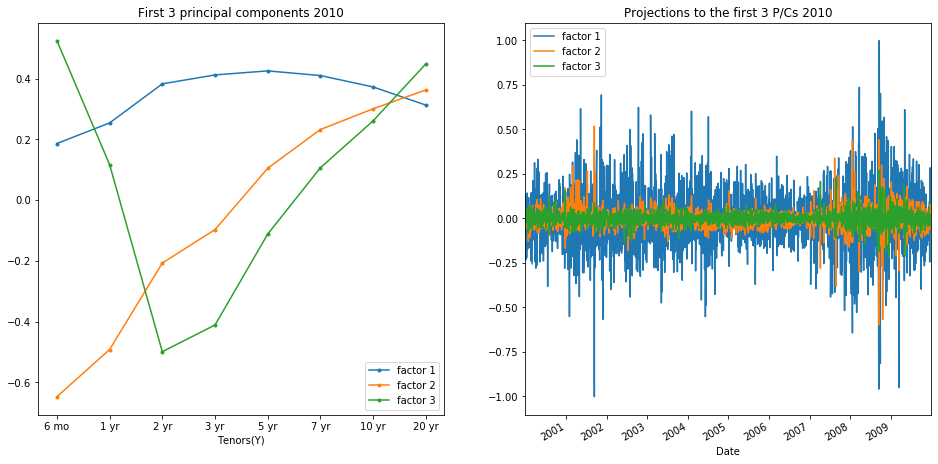

In [393]:
# Plottinf the principal components and their projections
flab = ['factor %d' % i for i in range(1, 4)]

fig = figure(figsize=[16, 8])
ax1 = fig.add_subplot(121)
plot(tenors, v_cv_2010[:, :3], '.-');
xlabel('Tenors(Y)')
legend(flab, loc='best')
title('First 3 principal components 2010');

fs = rates_2010.dot(v_cv_2010).iloc[:, :3]

ax2 = fig.add_subplot(122)
fs.plot(ax=ax2, title='Projections to the first 3 P/Cs 2010')
legend(flab, loc='best');
# The first component exlplains the variance of daily changes
# The econd one explains the change of slope and the the third one explains the curvature of the daily changes

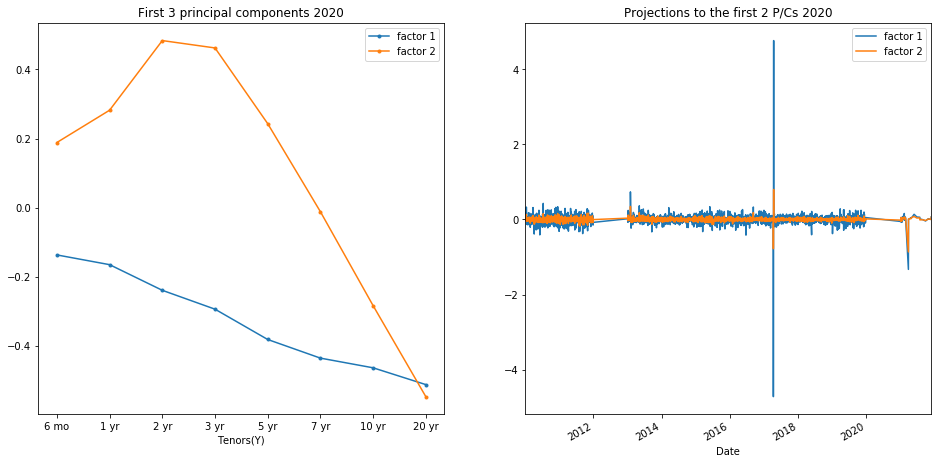

In [394]:
#Plotting the principal components and projections forr 2020 dataset
flab = ['factor %d' % i for i in range(1, 3)]

fig = figure(figsize=[16, 8])
ax1 = fig.add_subplot(121)
plot(tenors, v_cv_2020[:, :2], '.-');
xlabel('Tenors(Y)')
legend(flab, loc='best')
title('First 3 principal components 2020');

fs = rates_2020.dot(v_cv_2010).iloc[:, :2]

ax2 = fig.add_subplot(122)
fs.plot(ax=ax2, title='Projections to the first 2 P/Cs 2020')
legend(flab, loc='best');
#The first principal component explains the 93% variance of daily changes
#The second principal component mostly accounts for the extreme fluctuations of changes

In [395]:
# Separating first 3 peincipal components and scores to simulate dataset
x_cv_2010_pc = x_cv_2010[:3]
x_cv_2010_pc
v_cv_2010_pc = v_cv_2010[:3]

In [396]:
v_cv_2010_pc

array([[ 0.18604664, -0.6473516 ,  0.52473893, -0.43019165,  0.27931883,
         0.08594278, -0.02230702,  0.00199293],
       [ 0.25384838, -0.49207972,  0.11675438,  0.63293376, -0.49780581,
        -0.16974468,  0.04944092, -0.01065531],
       [ 0.38248871, -0.20728781, -0.49920402,  0.20631929,  0.3161397 ,
         0.62656972, -0.13577295,  0.08940712]])

In [487]:
#Generataing a random dataset of daily changes 
estimate = np.random.normal(size = [1000,250*10, 3])

In [488]:
# Taking square root of eigen values
sigma = np.sqrt(x_cv_2010_pc)


In [489]:
# Multiplying the square root of eigen values with eigen vectors
multiply = v_cv_2010_pc.T*sigma

In [490]:
multiply

array([[ 0.03053893,  0.01453758,  0.01290857],
       [-0.10626058, -0.0281808 , -0.00699574],
       [ 0.08613412,  0.00668638, -0.01684759],
       [-0.0706145 ,  0.03624734,  0.00696305],
       [ 0.04584924, -0.02850873,  0.01066937],
       [ 0.01410722, -0.00972107,  0.02114604],
       [-0.00366162,  0.00283142, -0.00458219],
       [ 0.00032713, -0.00061022,  0.00301739]])

In [491]:
# projecting the principal components on the random numbers generated
sim_res = estimate.dot(multiply.T)

In [504]:
# stacking the 3 dimensional arrays to 2dimensions
sim_res = sim_res.reshape(1000*2500 , 8)

In [505]:
sr = pd.DataFrame(sim_res)

In [506]:
# Covariance matrix of the simulated dataset from the principal components
sr.cov()

,0,1,2,3,4,5,6,7
0,0.001310,-0.003745,0.002510,-0.001540,0.001124,0.000562,-0.000130,0.000040
1,-0.003745,0.012135,-0.009224,0.006434,-0.004144,-0.001373,0.000341,-0.000039
2,0.002510,-0.009224,0.007748,-0.005958,0.003579,0.000794,-0.000219,-0.000027
3,-0.001540,0.006434,-0.005958,0.006348,-0.004196,-0.001201,0.000329,-0.000024
4,0.001124,-0.004144,0.003579,-0.004196,0.003028,0.001149,-0.000297,0.000065
5,0.000562,-0.001373,0.000794,-0.001201,0.001149,0.000740,-0.000176,0.000074
6,-0.000130,0.000341,-0.000219,0.000329,-0.000297,-0.000176,0.000042,-0.000017
7,0.000040,-0.000039,-0.000027,-0.000024,0.000065,0.000074,-0.000017,0.000010
